# DSC 478 Assignment 2 

Name: Kavana Manvi Krishnamurthy

Student ID: 2158984

## 1.	K-Nearest-Neighbor (KNN) classification on Newsgroups 

#### For this problem you will use a subset of the 20 Newsgroup data set. The full data set contains 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups and has been often used for experiments in text applications of machine learning techniques, such as text classification and text clustering (see the description of the full dataset). The assignment data set contains a subset of 1000 documents and a vocabulary of  5,500 terms. Each document belongs to one of two classes Hockey (class label 1) and Microsoft Windows (class label 0). The data has already been split (80%, 20%) into training and test data. The class labels for the training and test data are also provided in separate files. The training and test data are on term x document format, containing a row for each term in the vocabulary and a column for each document.The values in the table represent raw term occurrence counts. The data has already been preprocessed to extract tokens, remove stop words and perform stemming (so, the terms in the vocabulary are stems not full terms). Please be sure to read the readme.txt file in the distribution. Your tasks in this problem are the following [Note: for this problem you should not use scikit-learn for classification, but implement your own KNN classifier. You may use Pandas, NumPy, standard Python libraries, and Matplotlib.]

### a.	[5 pts] Load the data sets, including the train and test matrices as well as the train and test labels. Show the top 20 terms in the decreasing order of total training frequency (total number of occurences of the term across all documents in the training data). Then plot the distribtution of term frequencies in the training data (using a line plot similar to class examples).


#### Load Train set and classes

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df_train_set = pd.read_csv("/Users/kavanamanvi/Desktop/PML/HW2/newsgroups/trainMatrixModified.txt",sep='\t', header=None)
df_train_set.head(3)

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df_train_set.shape

(5500, 800)

In [10]:
df_train_classes = pd.read_csv("/Users/kavanamanvi/Desktop/PML/HW2/newsgroups/trainClasses.txt",sep='\t',  header=None, index_col=0)
df_train_classes.head(3)

,1
0,
0,0
1,1
2,0


In [11]:
df_train_classes.shape

(800, 1)

#### Load Test set and classes

In [13]:
df_test_set = pd.read_csv("/Users/kavanamanvi/Desktop/PML/HW2/newsgroups/testMatrixModified.txt",sep='\t',  header=None)
df_test_set.head(3)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df_test_set.shape

(5500, 200)

In [15]:
df_test_classes = pd.read_csv("/Users/kavanamanvi/Desktop/PML/HW2/newsgroups/testClasses.txt",sep='\t',  header=None,index_col=0)
df_test_classes.head(3)

,1
0,
0,1
1,0
2,0


In [16]:
df_test_classes.shape

(200, 1)

In [17]:
#terms
terms =  pd.read_csv("/Users/kavanamanvi/Desktop/PML/HW2/newsgroups/modifiedterms.txt",sep='\t',  header=None)
terms.head(10)

,0
0,david
1,rex
2,wood
3,subject
4,call
5,librari
6,creat
7,widget
8,multipl
9,time


In [18]:
terms.shape

(5500, 1)

In [19]:
#compute term frequencies
print("Top 20 terms in decreasing order of frequency")
termFreqs = df_train_set.sum(axis=1)
numpy_term_freq = numbers = np.array(termFreqs)
int_i=0
top20_terms={}
#print(f"{'Term':<9} : Frequency")

for tf in termFreqs: 
    # Max value
    max_value = np.max(numpy_term_freq)
    
    # Index of the max value
    max_index = np.argmax(numpy_term_freq)
    numpy_term_freq[max_index] = 0

    top20_terms[terms.iloc[max_index, 0]] = max_value


    #print the values
    print(f"{terms.iloc[max_index, 0]:<10}: {max_value:.1f}")

    
    int_i+=1
    if int_i==20:
        break
    

Top 20 terms in decreasing order of frequency
subject   : 959.0
window    : 720.0
game      : 680.0
do        : 578.0
get       : 545.0
write     : 483.0
team      : 470.0
on        : 429.0
plai      : 401.0
go        : 378.0
file      : 370.0
program   : 329.0
includ    : 326.0
just      : 325.0
player    : 323.0
articl    : 319.0
time      : 318.0
hockei    : 311.0
know      : 302.0
year      : 300.0


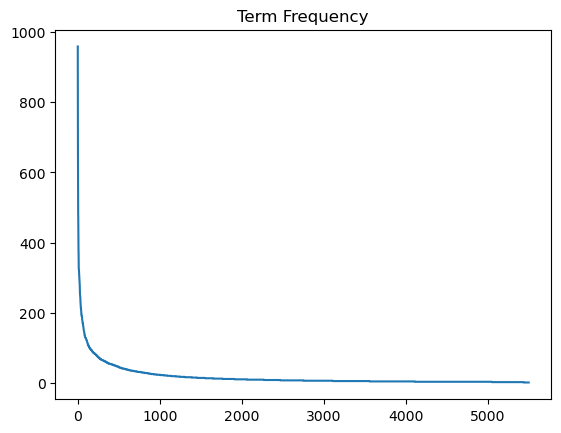

In [20]:
#plot
plt.plot(sorted(termFreqs, reverse=True))
plt.title("Term Frequency")
plt.show()

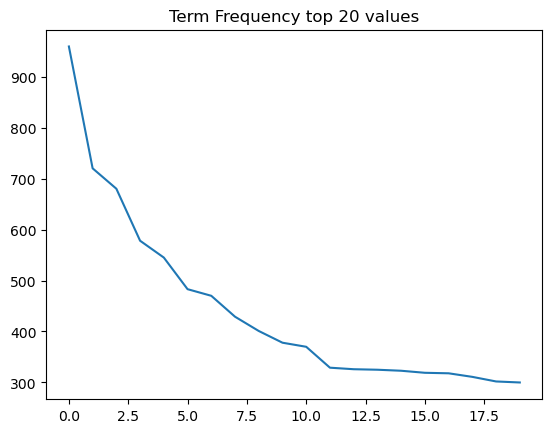

In [21]:
top20_termFreqs = []
for val in top20_terms.values():
    top20_termFreqs.append(val)
#plot
plt.plot(sorted(top20_termFreqs, reverse=True))
plt.title("Term Frequency top 20 values")
plt.show()

### b.	[10 pts] Create your own K-Nearest-Neighbor classifier function. Your classifier should allow as input the training data matrix, the training labels, the instance to be classified, the value of K (number of neighbors), and should return the predicted class for the instance and the indices of the top K neighbors. Your classifier should work with Euclidean distance as well as Cosine distance (which is 1 minus the Cosine similarity), Manhattan Distance, and Pearson distance (1-Pearson Correlation). You may create four separate classifiers, or add the distance metric as a parameter in the classifier function (an example implementation of a KNN classifier was provided in class examples). Show that your classifier works by running it on the first two instances in the test data using both Cosine, Euclidean, Manhattan, and Pearson distance in each case.

In [23]:
TD_train=df_train_set
TD_train.shape

(5500, 800)

In [24]:
#Transpose the term-document training  matrix
DT_train = TD_train.T
DT_train.shape

(800, 5500)

In [25]:
TD_test=df_test_set
TD_test.shape

(5500, 200)

In [26]:
#Transpose the term-document test matrix
DT_test = TD_test.T
DT_test.shape

(200, 5500)

In [27]:
numTerms = DT_train.shape[1]
NDocs = DT_train.shape[0]
print("Number of terms: "+str(numTerms))
print("Number of documents: "+str(NDocs))

Number of terms: 5500
Number of documents: 800


In [28]:
#convert Data frame to numpy array
DTM_train = np.array(DT_train)
DTM_train.shape

(800, 5500)

In [29]:
#convert Data frame to numpy array
DTM_test = np.array(DT_test)
DTM_test.shape

(200, 5500)

In [30]:
#convert train classes to nparray
train_lab_arr = np.array(df_train_classes).flatten()

In [31]:
#convert test classes to nparray
test_lab_arr = np.array(df_test_classes).flatten()

In [32]:
def educlidean(x,D):
    dists=np.sqrt(((D - x)**2).sum(axis=1))
    return dists

def cos(x,D):
    # first find the vector norm for each instance in D as wel as the norm for vector x
    D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
    x_norm = np.linalg.norm(x)
    # Compute Cosine: divide the dot product o x and each instance in D by the product of the two norms
    sims = np.dot(D,x)/(D_norm * x_norm)
    # The distance measure will be the inverse of Cosine similarity
    return 1-sims

def manhattan(x,D):
    return np.abs((D - x)).sum(axis=1)
    
def pearson_distance(x,D):
    
    D_mean = np.mean(D, axis=1)
    x_mean = np.mean(x)
    D_centered = D - D_mean[:, np.newaxis]
    x_centered = x - x_mean
    numerator = np.dot(D_centered, x_centered)
    denominator = np.linalg.norm(D_centered, axis=1) * np.linalg.norm(x_centered)
    dists = 1 - numerator / denominator
    
    return dists


In [33]:
def knn_search(x, D, K, measure):
    """ find K nearest neighbors of an instance x among the instances in D """
    x=x.flatten()
    if measure == 0:
        # euclidean distances from the other points
        dists = educlidean(x,D)
    elif measure == 1:
        # cosine distance from other points
        dists = cos(x,D)
    elif measure == 2:
        # manhattan distances from the other points
        dists = manhattan(x,D)
    elif measure == 3:
        # Pearson distance (1 - Pearson correlation)
        dists = pearson_distance(x,D)

    idx = np.argsort(dists) # sorting
    # return the indexes of K nearest neighbors
    return idx[:K], dists


In [34]:
def knn_classify(x, D, K, labels, measure):
    from collections import Counter
    neigh_idx, distances = knn_search(x, D, K, measure)
    neigh_labels = labels[neigh_idx]
    count = Counter(neigh_labels)
    #print(neigh_labels)
    #print("Labels for top ", K, "neighbors: ", count)
    predicted_label = count.most_common(1)[0][0]
    return neigh_idx,predicted_label 

#### Eclidean distance

In [36]:
x = DTM_test[0] 
D = DTM_train
k = 5
labels=train_lab_arr
measure = 0 # For Euclidean distance

top_k_neigh, pred_class = knn_classify(x,D, k,labels, measure)
print("Indexes of K nearest neighbors:", top_k_neigh)
print("Predicted Class of K nearest neighbors:", pred_class)

Indexes of K nearest neighbors: [685 628 703 266 510]
Predicted Class of K nearest neighbors: 1


In [37]:
x = DTM_test[1] 
D = DTM_train
k = 5
labels=train_lab_arr
measure = 0 # For Euclidean distance

top_k_neigh, pred_class = knn_classify(x,D, k,labels, measure)
print("Indexes of K nearest neighbors:", top_k_neigh)
print("Predicted Class of K nearest neighbors:", pred_class)

Indexes of K nearest neighbors: [798 554 757 224  38]
Predicted Class of K nearest neighbors: 0


#### Cosine distance

In [39]:
x = DTM_test[0] 
D = DTM_train
k = 5
labels=train_lab_arr
measure = 1 # For Euclidean distance

top_k_neigh, pred_class = knn_classify(x,D, k,labels, measure)
print("Indexes of K nearest neighbors:", top_k_neigh)
print("Predicted Class of K nearest neighbors:", pred_class)

Indexes of K nearest neighbors: [685 628 667 152 427]
Predicted Class of K nearest neighbors: 1


In [40]:
x = DTM_test[1] 
D = DTM_train
k = 5
labels=train_lab_arr
measure = 1 # For Euclidean distance

top_k_neigh, pred_class = knn_classify(x,D, k,labels, measure)
print("Indexes of K nearest neighbors:", top_k_neigh)
print("Predicted Class of K nearest neighbors:", pred_class)

Indexes of K nearest neighbors: [382 775 163 587 550]
Predicted Class of K nearest neighbors: 0


#### Manhattan distance

In [42]:
x = DTM_test[0] 
D = DTM_train
k = 5
labels=train_lab_arr
measure = 2 # For Euclidean distance

top_k_neigh, pred_class = knn_classify(x,D, k,labels, measure)
print("Indexes of K nearest neighbors:", top_k_neigh)
print("Predicted Class of K nearest neighbors:", pred_class)

Indexes of K nearest neighbors: [685 798 703 757  38]
Predicted Class of K nearest neighbors: 1


In [43]:
x = DTM_test[1] 
D = DTM_train
k = 5
labels=train_lab_arr
measure = 2 # For Euclidean distance

top_k_neigh, pred_class = knn_classify(x,D, k,labels, measure)
print("Indexes of K nearest neighbors:", top_k_neigh)
print("Predicted Class of K nearest neighbors:", pred_class)

Indexes of K nearest neighbors: [798 757 224  38 342]
Predicted Class of K nearest neighbors: 0


#### Pearson distance

In [45]:
x = DTM_test[0] 
D = DTM_train
k = 5
labels=train_lab_arr
measure = 3 # For Euclidean distance

top_k_neigh, pred_class = knn_classify(x,D, k,labels, measure)
print("Indexes of K nearest neighbors:", top_k_neigh)
print("Predicted Class of K nearest neighbors:", pred_class)

Indexes of K nearest neighbors: [685 628 667 152 427]
Predicted Class of K nearest neighbors: 1


In [46]:
x = DTM_test[1] 
D = DTM_train
k = 5
labels=train_lab_arr
measure = 3 # For Euclidean distance

top_k_neigh, pred_class = knn_classify(x,D, k,labels, measure)
print("Indexes of K nearest neighbors:", top_k_neigh)
print("Predicted Class of K nearest neighbors:", pred_class)

Indexes of K nearest neighbors: [382 775 163 587 550]
Predicted Class of K nearest neighbors: 0


### c.[10 pts] Create an evaluation function to measure the accuracy of your classifier. This function will call the classifier function in part a on all the test instances and in each case compares the actual test class label to the predicted class label. It should take as input the training data, the training labels, the test instances, the labels for test instances, and the value of K. Your evaluation function should return the Classification Accuracy (ratio of correct predictions to the number of test instances) [See class notes: Classification & Prediction - Review of Basic Concepts].

In [48]:
def knn_evaluate(test, test_labs, train, train_labs, K, measure):
    # Inputs:
    # test: an array or list of test instances
    # test_labs: an array or list of class labels for the corresponding test instances in test
    # train: the training instances
    # train_labs: class labels for the corresponding training instances in train
    # K: number of neighbors
    # measure: 0 = Euclidean distance; 1 = Cosine distance

    T=0 # no. of correctly classified instances
    F=0 # no. of incorrectly classified instances
    for i in range(len(test)):
        actual=test_labs[i]
        top_K_neighbors, predicted = knn_classify(test[i], train, K, train_labs, measure)
        if actual == predicted:
            T += 1       
        else:
            F += 1     
    accuracy = float(T)/float(T+F) 
    return accuracy

In [49]:
error_count = knn_evaluate(DTM_test, test_lab_arr, DTM_train, train_lab_arr, 5, 0)
print(error_count)

0.815


### d.	[10 pts] Run your evaluation function on a range of values for K from 5 to 100 (in increments of 5) in order to compare accuracy values for different numbers of neighbors. Do this using Euclidean Distance , Cosine distance, Manhattan Distance, and Pearson Distance (as defined above) measures. Present the results as graphs with K in the x-axis and the evaluation metric (accuracy) on the y-axis. Use a single plot to compare the four versions of the classifiers (Euclidean distance version vs. cosine distance vs. Manhattan Distance vs. Pearson Distance ).

In [51]:
lst_Euclid=[]
for K in range(5,101,5):
    lst_Euclid.append(knn_evaluate(DTM_test, test_lab_arr, DTM_train, train_lab_arr, K, 0))

In [52]:
lst_Cosine=[]
for K in range(5,101,5):
    lst_Cosine.append(knn_evaluate(DTM_test, test_lab_arr, DTM_train, train_lab_arr, K, 1))

In [53]:
lst_Manhattan=[]
for K in range(5,101,5):
    lst_Manhattan.append(knn_evaluate(DTM_test, test_lab_arr, DTM_train, train_lab_arr, K, 2))

In [54]:
lst_Pearson=[]
for K in range(5,101,5):
    lst_Pearson.append(knn_evaluate(DTM_test, test_lab_arr, DTM_train, train_lab_arr, K, 3))

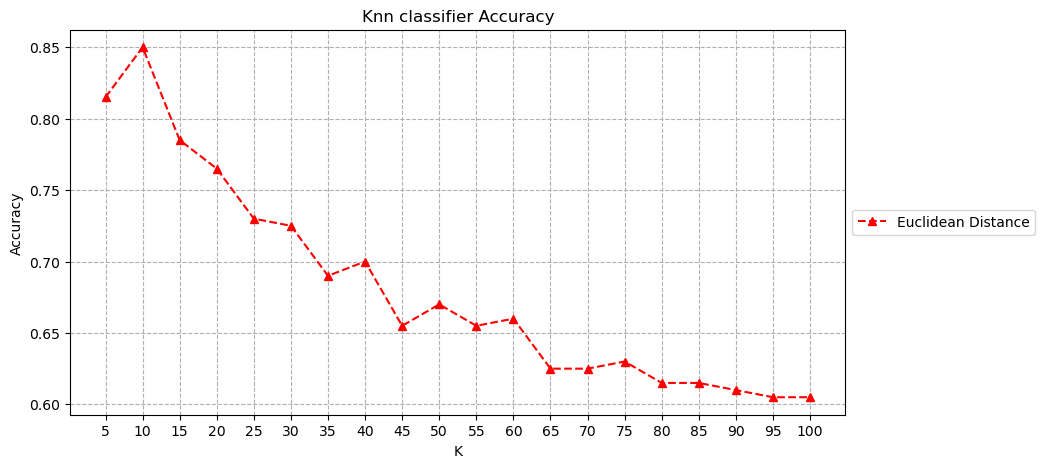

In [697]:
Ks=list(range(5, 101, 5))
plt.figure(figsize=(10,5))
plt.plot(Ks, lst_Euclid, 'r^--', label='Euclidean Distance')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Knn classifier Accuracy')
plt.grid(linestyle='--')
plt.xticks(Ks)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

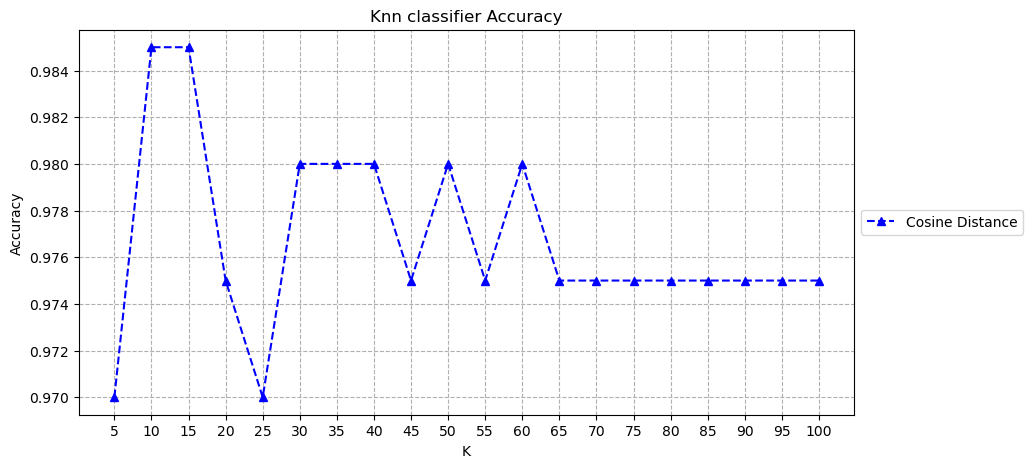

In [699]:
Ks=list(range(5, 101, 5))
plt.figure(figsize=(10,5))
plt.plot(Ks, lst_Cosine, 'b^--', label='Cosine Distance')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Knn classifier Accuracy')
plt.grid(linestyle='--')
plt.xticks(Ks)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

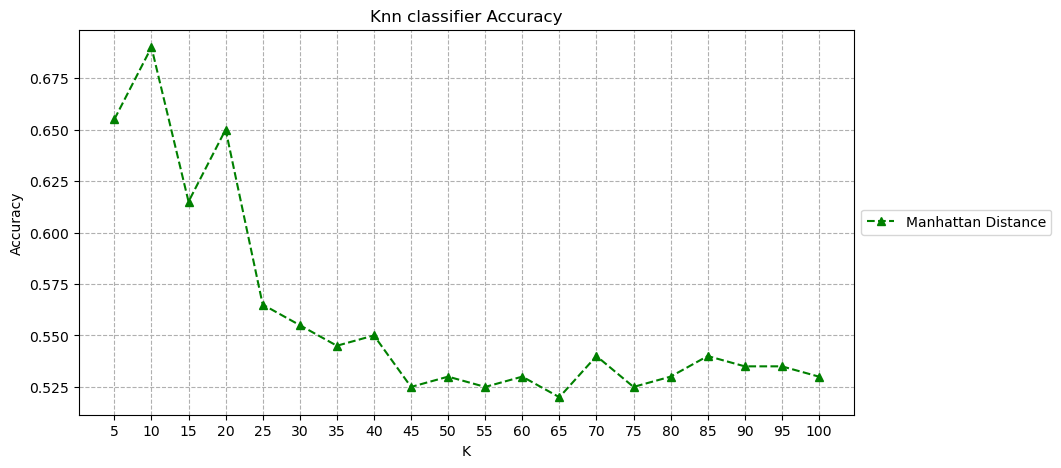

In [701]:
Ks=list(range(5, 101, 5))
plt.figure(figsize=(10,5))
plt.plot(Ks, lst_Manhattan, 'g^--', label='Manhattan Distance')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Knn classifier Accuracy')
plt.grid(linestyle='--')
plt.xticks(Ks)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

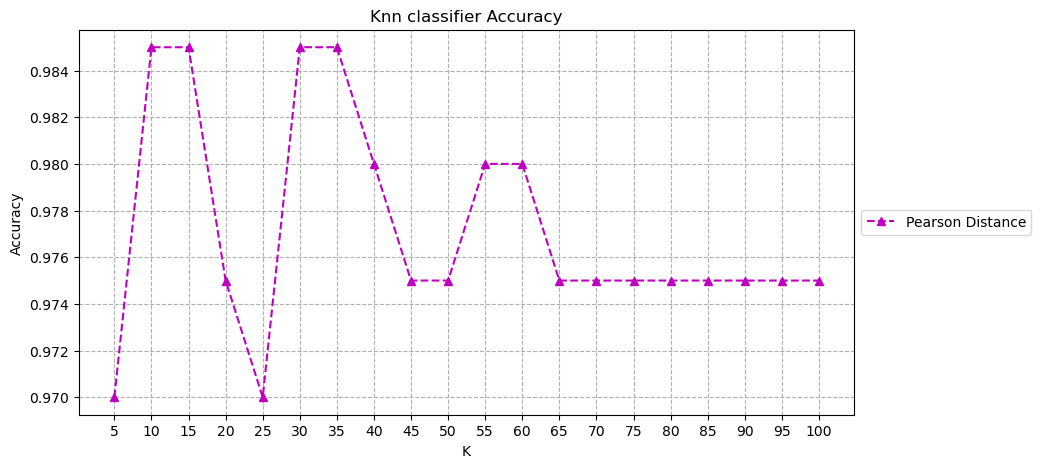

In [703]:
Ks=list(range(5, 101, 5))
plt.figure(figsize=(10,5))
plt.plot(Ks, lst_Pearson, 'm^--', label='Pearson Distance') 
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Knn classifier Accuracy')
plt.grid(linestyle='--')
plt.xticks(Ks)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

###  e.	[10 pts] Next, modify the training and test data sets so that term weights are converted to TFxIDF weights (instead of raw term frequencies). [See class notes on Text Categorization]. Then, rerun your evaluation (only for the Cosine similarity version of the classifier) on the range of K values (as above) and create a chart comparing the results with and without using TFxIDF weights.

#### Compute TF-IDF for the Training Dataset

In [59]:
DF_train = pd.DataFrame([(TD_train!=0).sum(1)]).T
DF_train

,0
0,50
1,7
2,10
3,800
4,108
...,...
5495,3
5496,3
5497,2
5498,2


In [60]:
# Create a matrix with all entries = NDocs
NMatrix=np.ones(np.shape(TD_train), dtype=float)*NDocs
np.set_printoptions(precision=2,suppress=True,linewidth=120)
print(NMatrix)
NMatrix.shape

[[800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 ...
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]]


(5500, 800)

In [61]:
# Convert each entry into IDF values
# IDF is the log of the inverse of document frequency
# Note that IDF is only a function of the term, so all columns will be identical.

IDF = np.log2(np.divide(NMatrix, np.array(DF_train)))
IDF.shape
IDF

array([[4.  , 4.  , 4.  , ..., 4.  , 4.  , 4.  ],
       [6.84, 6.84, 6.84, ..., 6.84, 6.84, 6.84],
       [6.32, 6.32, 6.32, ..., 6.32, 6.32, 6.32],
       ...,
       [8.64, 8.64, 8.64, ..., 8.64, 8.64, 8.64],
       [8.64, 8.64, 8.64, ..., 8.64, 8.64, 8.64],
       [8.64, 8.64, 8.64, ..., 8.64, 8.64, 8.64]])

In [62]:
TD_train

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
# Finally compute the TFxIDF values for each document-term entry
TD_tfidf_train = TD_train * IDF

In [64]:
pd.set_option("display.precision", 2)
TD_tfidf_train

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,8.00,0.00,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1,13.67,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,20.51,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,12.64,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4,23.11,2.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.78,0.0,0.0,0.0,0.0,0.0,0.0,2.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
5496,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
5497,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
5498,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00


In [65]:
x = DTM_test[0]
x_tfidf = x * IDF.T[0]  # note that this coordinatewise multiplication of two vectors
x_tfidf

array([0., 0., 0., ..., 0., 0., 0.])

In [96]:
DT_tfidf_train = TD_tfidf_train.T
DT_train_array= np.array(DT_tfidf_train)

In [67]:
# Finding the k=5 nearest neighbors using inverse of Cosine similarity as a distance metric
neigh_idx, distances = knn_search(x_tfidf, DT_train_array, 5, 1)
print("Query:", x)
print("\nNeighbors:")
neigh_idx

Query: [0. 0. 0. ... 0. 0. 0.]

Neighbors:


array([685, 628, 152, 194, 731])

In [68]:
#create a test matrix with tfidf values
DTM_test_tfidf = DTM_test
for i in range(len(test_lab_arr)):
    DTM_test_tfidf[i] = DTM_test_tfidf[i] * IDF.T[i]

In [69]:
#calciulate error value
error_val= knn_evaluate(DTM_test_tfidf, test_lab_arr,DT_train_array, train_lab_arr, 5, 1)
print(error_val)

0.98


In [70]:
lst_Cosine_tfidf=[]
for K in range(5,101,5):
    lst_Cosine_tfidf.append( knn_evaluate(DTM_test_tfidf, test_lab_arr,DT_train_array, train_lab_arr, K, 1))

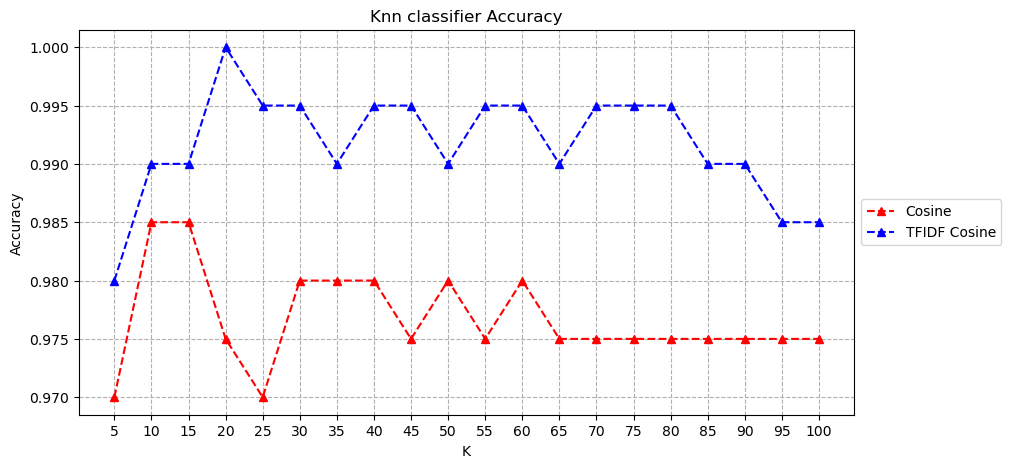

In [71]:
Ks=list(range(5, 101, 5))
plt.figure(figsize=(10,5))
plt.plot(Ks, lst_Cosine, 'r^--', label='Cosine')
plt.plot(Ks, lst_Cosine_tfidf, 'b^--', label='TFIDF Cosine') 
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Knn classifier Accuracy')
plt.grid(linestyle='--')
plt.xticks(Ks)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

#### Compute TF-IDF for the Test Dataset

### f.	[10 pts] Create a new classifier based on the Rocchio Method (also know as the "nearest centroid" method) adapted for text categorization [See class notes on Text Categorization]. You should separate the training function from the classification function. The training part for the classifier can be implemented as a function that takes as input the training data matrix and the training labels, returning the prototype vectors for each class. The classification part can be implemented as another function that would take as input the prototypes returned from the training function and the instance to be classified. This function should measure Cosine similarity of the test instance to each prototype vector. Your output should indicate the predicted class for the test instance and the similarity values of the instance to each of the category prototypes.  Finally, use your evaluation function to compare your results to the best KNN results you obtained in part d. [Note: your functions should work regardless of the number of categories (class labels) and should not be limited to two-class categorization scenario. The number of classes should not be hardcoded in your implementation.]

##### Rocchio Text Categorization Algorithm: Training

Assume the set of categories is {c1, c2,...cn}

For i from 1 to n let pi = <0, 0,...,0> (init. prototype vectors)

For each training example <x, c(x)> ∈ D

  Let d be the TF/IDF term vector for doc x

  Let i = j where cj = c(x)

  (sum all the document vectors in ci to get pi) 

  Let pi = pi +d

In [519]:
DT_tfidf_train.head(3)

,0,1,2,3,4,5,6,7,8,9,...,5490,5491,5492,5493,5494,5495,5496,5497,5498,5499
0,8.0,13.67,12.64,0.0,23.11,27.86,7.89,32.71,9.78,8.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.00,0.00,0.0,2.89,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.00,0.00,0.0,0.00,0.00,0.00,8.18,0.00,2.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [523]:
#Assume the set of of categories is c1,c2,...cn
# FInd n = number of categories
n_categories = np.unique(df_train_classes[1])
n_categories

array([0, 1])

In [527]:
n_features = DT_tfidf_train.shape[1]  
n_features

5500

In [347]:
# Initialize prototype vectors for each category 
#prototype_vectors = {category: np.zeros(n_features) for category in categories}

In [529]:
# Initialize prototype vectors as a 2D NumPy array
prototype_vectors = np.zeros((len(n_categories), n_features))

In [531]:
prototype_vectors.shape

(2, 5500)

In [539]:
# Initialize and update prototype_vectors
for i in range(0,800):
    label = train_lab_arr[i] 
    prototype_vectors[label] += DT_tfidf_train.iloc[i]

In [541]:
prototype_vectors[0]

array([228.  ,  27.35,  31.61, ...,   8.64,  17.29,  17.29])

In [543]:
prototype_vectors[1]

array([180.  ,  47.86, 107.47, ...,   8.64,   0.  ,   0.  ])

##### Rocchio Text Categorization Algorithm: Testing

Given test document x

Let d be the TF/IDF term vector for x

Let m = –2 (init. maximum cosSim) 

For i from 1 to n:

(compute similarity to prototype vector) 

  Let s = cosSim(d, pi)

  if s > m
    
    let m = s
    
    let r = ci (update most similar class prototype) 

Return class r

In [537]:
def cos_vectors(a,b):
    # Find the norms for both vectors
    a_norm = np.linalg.norm(a)
    b_norm = np.linalg.norm(b)

    dot_product = np.dot(a,b)
    norm_products = a_norm * b_norm
    
    # Compute Cosine similarity: dot product of x and y divided by the product of their norms
    if norm_products!=0:
        cosine_similarity = dot_product / norm_products

    #print(f"norm prod: {norm_products}, dot_product: {np.dot(a,b)}, cosine_similarity: {cosine_similarity}")
    
    # The distance measure will be the inverse of cosine similarity
    return 1-cosine_similarity

In [545]:
cos_vectors(prototype_vectors[0],prototype_vectors[1])

0.7772358229147577

In [559]:
# Rocchio Classification function

def rocchio_test(x, prototype_vectors, categories):
    
    sim_vals=[]
        

    m = 2  # Initialize max cosine similarity to -2
    r = None  # Placeholder for the predicted class
    lst_cos_simi = []  # List to store cosine similarity for each category
        
        # Compute cosine similarity with each prototype vector
    for category in categories:
        p= prototype_vectors[category]
        #print(p)
        s = cos_vectors(x,p) # Compute cosine similarity between doc vector and prototype vector
        sim_vals.append(s)
       
        if s < m:  # If similarity is greater than current max
            m = s
            r = category  # Update most similar class
        
        

    return r,sim_vals

In [567]:
# Run the Rocchio algorithm on the test set first value to see the output
predicted_classes, similarity_values = rocchio_test(DTM_test_tfidf[1], prototype_vectors, categories)
print("Predicted calss: "+str(predicted_classes))
print("Actual class: "+str(test_lab_arr[1]))
print("Cosine similarity values: "+str(similarity_values))

Predicted calss: 0
Actual class: 0
Cosine similarity values: [0.8022551505317693, 0.9503776498112031]


In [569]:
def knn_rocchio_evaluate(test, test_labs, prototype_vectors, categories):
    # Inputs:
    # test: an array or list of test instances
    # test_labs: an array or list of class labels for the corresponding test instances in test
    # train: the training instances
    # train_labs: class labels for the corresponding training instances in train
    # K: number of neighbors
    # measure: 0 = Euclidean distance; 1 = Cosine distance

    T=0 # no. of correctly classified instances
    F=0 # no. of incorrectly classified instances
    for i in range(len(test_labs)):
        actual=test_labs[i]
        predicted,sim_vals = rocchio_test(test[i], prototype_vectors, categories)
        if actual == predicted:
            T += 1       
        else:
            F += 1     
        
    accuracy = float(T)/float(T+F) 
    return accuracy

In [571]:
accuracy = knn_rocchio_evaluate( DTM_test_tfidf, test_lab_arr, prototype_vectors, categories)
print(accuracy)

0.98


### g.	[5 pts] Using scikit-learn's Nearest Centroid classifier to perform classification of the test instances, as in the previous part. Compare the classification accuracy of your Rocchio implementation to the classification results using scikit-learn.

In [573]:
from sklearn.neighbors import NearestCentroid
import numpy as np
X = np.array(DTM_train)
y = np.array(df_train_classes[1])
knnclf = NearestCentroid()
knnclf.fit(X, y)

NearestCentroid()

In [577]:
knnpreds_test = knnclf.predict(DTM_test)

In [579]:
from sklearn.metrics import classification_report
print(classification_report(np.array(df_test_classes[1]), knnpreds_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        99
           1       0.98      0.99      0.99       101

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200



In [583]:
accuracy_score(knnpreds_test,df_test_classes)

0.985

The accuracy of Rocchio method is 98% where as the scikit learn's Nearest Centroid classifier accuracy is 98.5%

## 2.	Predictive Modeling with Wine dataset
For this problem you will use a simplified version of the Wine Data Set. DO the following to get it into Python:


In [444]:
from sklearn.datasets import load_wine
# Load the wine dataset
wine = load_wine()

In [446]:
# Create a DataFrame with feature data and feature names
dfWine = pd.DataFrame(wine.data, columns=wine.feature_names)

In [458]:
# Add the target variable as a new column
dfWine['target'] = wine.target

In [450]:
# Create a mapping of target values to wine class names
target_names = {i: name for i, name in enumerate(wine.target_names)}

In [460]:
dfWine['class'] = dfWine['target'].map(target_names)
dfWineTarget=dfWine['target']
dfWine=dfWine.drop(columns=['class','target'])
display(dfWine)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [456]:
display(dfWineTarget)

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64

### a.	[5 pts] Load the data into a Pandas dataframe as above. Create dummy variables only if necessary for the categorical attributes so that the data set is fully numeric. Finally, split the transformed data into training and test sets (using 80%-20% randomized split). Note: use the train_test_split function from the sklearn.model_selection module with random_state = 111 to perform the split.

In [463]:
dfWine.shape

(178, 13)

In [465]:
dfWine.head(4)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0


In [467]:
dfWineTarget.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [469]:
#no need to do dummies since all avariables are numeric

In [471]:
from sklearn.model_selection import train_test_split
dfWine_train_set, dfWine_test_set, dfWine_train_classes, dfWine_test_classes = train_test_split(dfWine, dfWineTarget, test_size=0.2, random_state=111)


In [473]:
print(dfWine_test_set.shape)
dfWine_test_set[0:5]

(36, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
129,12.04,4.30,2.38,22.0,80.0,2.10,1.75,0.42,1.35,2.60,0.79,2.57,580.0
83,13.05,3.86,2.32,22.5,85.0,1.65,1.59,0.61,1.62,4.80,0.84,2.01,515.0
35,13.48,1.81,2.41,20.5,100.0,2.70,2.98,0.26,1.86,5.10,1.04,3.47,920.0
150,13.50,3.12,2.62,24.0,123.0,1.40,1.57,0.22,1.25,8.60,0.59,1.30,500.0
117,12.42,1.61,2.19,22.5,108.0,2.00,2.09,0.34,1.61,2.06,1.06,2.96,345.0


In [475]:
print(dfWine_train_set.shape)
dfWine_train_set[0:5]

(142, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
24,13.50,1.81,2.61,20.0,96.0,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845.0
113,11.41,0.74,2.50,21.0,88.0,2.48,2.01,0.42,1.44,3.08,1.10,2.31,434.0
138,13.49,3.59,2.19,19.5,88.0,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580.0
136,12.25,4.72,2.54,21.0,89.0,1.38,0.47,0.53,0.80,3.85,0.75,1.27,720.0
55,13.56,1.73,2.46,20.5,116.0,2.96,2.78,0.20,2.45,6.25,0.98,3.03,1120.0


In [477]:
print(dfWine_train_classes.shape)
dfWine_train_classes[0:5]

(142,)


24     0
113    1
138    2
136    2
55     0
Name: target, dtype: int64

### b. Use scikit-learn's KNN implementation for classification. 
#### i.	First normalize the data so that all attributes are in the same scale (normalize so that the values are between 0 and 1). Run your KNN classifier using K=10. Generate the confusion matrix (visualize it using Matplotlib) as well as the classification report. Report the model accuracy for both the training and the test sets.


In [130]:
#normalize min max scaling
from sklearn import preprocessing

In [479]:
#df_adult_train_set, df_adult_test_set, df_adult_train_classes, df_adult_test_classes
min_max_scaler = preprocessing.MinMaxScaler().fit(dfWine_train_set)

dfWine_train_norm = min_max_scaler.transform(dfWine_train_set)
display(type(dfWine_train_norm))

numpy.ndarray

In [481]:
dfWine_train_norm = pd.DataFrame(dfWine_train_norm, columns=dfWine_train_set.columns, index=dfWine_train_set.index)
display(type(dfWine_train_norm))

pandas.core.frame.DataFrame

In [483]:
dfWine_test_norm = min_max_scaler.transform(dfWine_test_set)
dfWine_test_norm = pd.DataFrame(dfWine_test_norm, columns=dfWine_test_set.columns, index=dfWine_test_set.index)

In [485]:
np.set_printoptions(precision=2, linewidth=80, suppress=True)
dfWine_train_norm.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
24,0.61,0.21,0.67,0.48,0.28,0.52,4.64e-01,0.28,0.39,0.19,0.64,0.93,0.40
113,0.00,0.00,0.61,0.54,0.20,0.50,3.34e-01,0.55,0.32,0.15,0.62,0.38,0.11
138,0.61,0.56,0.44,0.46,0.20,0.19,2.17e-03,0.85,0.15,0.38,0.30,0.20,0.22
136,0.25,0.79,0.63,0.54,0.21,0.10,0.00e+00,0.75,0.12,0.22,0.23,0.00,0.32
55,0.63,0.20,0.59,0.51,0.50,0.68,5.01e-01,0.13,0.64,0.42,0.48,0.64,0.60


In [487]:
dfWine_test_norm.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
129,0.18,0.70,0.55,0.59,0.11,0.36,0.28,0.55,0.30,0.11,0.27,0.48,0.22
83,0.48,0.62,0.51,0.61,0.16,0.20,0.24,0.91,0.38,0.30,0.33,0.27,0.17
35,0.61,0.21,0.56,0.51,0.33,0.58,0.54,0.25,0.46,0.33,0.55,0.81,0.46
150,0.61,0.47,0.67,0.69,0.58,0.11,0.24,0.17,0.26,0.62,0.05,0.01,0.16
117,0.30,0.17,0.44,0.61,0.41,0.33,0.35,0.40,0.38,0.07,0.57,0.62,0.05


In [489]:
#run knn
from sklearn import neighbors

In [491]:
n_neighbors = 10

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfWine_train_norm, dfWine_train_classes)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [493]:
#Predict classes
knnpreds_test = knnclf.predict(dfWine_test_norm)
print(knnpreds_test)

[1 2 0 2 1 2 1 1 2 0 2 1 1 0 0 0 2 1 2 1 1 0 0 2 0 2 1 2 1 0 1 0 0 0 2 0]


In [495]:
#evaluate the model
from sklearn.metrics import classification_report

In [497]:
print(classification_report(dfWine_test_classes, knnpreds_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.92      0.96        13
           2       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



In [499]:
#confusion matrix
from sklearn.metrics import confusion_matrix

In [503]:
knncm = confusion_matrix(dfWine_test_classes, knnpreds_test)
print(knncm)

[[13  0  0]
 [ 0 12  1]
 [ 0  0 10]]


In [505]:
#compute the average accuracy score across the test instances
print(knnclf.score(dfWine_test_norm, dfWine_test_classes))

0.9722222222222222


In [507]:
#This can be compared to the performance on the training data itself (to check for over- or under-fitting)
print(knnclf.score(dfWine_train_norm, dfWine_train_classes))

1.0


#### ii.	Next, experiment with different values of K (say from 5 to 100) and the weight parameter (i.e., with or without distance weighting) to see if you can improve accuracy of the KNN classifier. Show the results in a single plot comparing distance and uniform weighting schemes across the different values of K. Use the best values of these parameter (K and weighting scheme) to train a new KNN classifier and report the accuracy of this classifier on the training and test sets.

In [509]:
from sklearn.metrics import accuracy_score

In [515]:
#K values from 5-100 with distance
k_dist_accuracy_scores=[]
for k in range(5,101,5):
    knnclf = neighbors.KNeighborsClassifier(k, weights='distance')
    knnclf.fit(dfWine_train_norm, dfWine_train_classes)
    knnpreds_test = knnclf.predict(dfWine_test_norm)
    k_dist_accuracy_scores.append(knnclf.score(dfWine_test_norm, dfWine_test_classes))

In [590]:
#K values from 5-100 with uniform
k_uniform_accuracy_scores=[]
for k in range(5,101,5):
    knnclf = neighbors.KNeighborsClassifier(k, weights='uniform')
    knnclf.fit(dfWine_train_norm, dfWine_train_classes)
    knnpreds_test = knnclf.predict(dfWine_test_norm)
    k_uniform_accuracy_scores.append(knnclf.score(dfWine_test_norm, dfWine_test_classes))

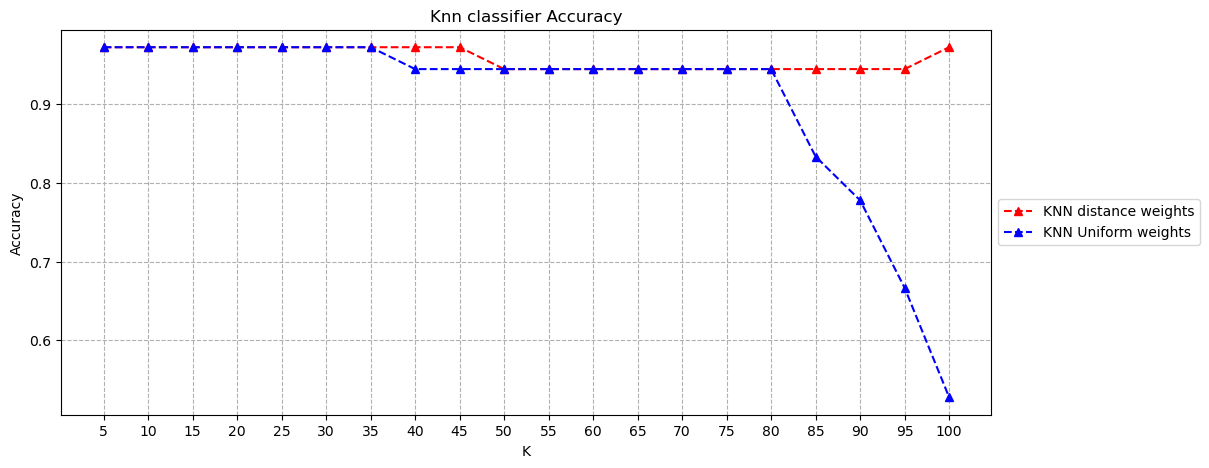

In [592]:
Ks=list(range(5, 101, 5))
plt.figure(figsize=(12,5))
plt.plot(Ks, k_dist_accuracy_scores, 'r^--', label='KNN distance weights')
plt.plot(Ks, k_uniform_accuracy_scores, 'b^--', label='KNN Uniform weights') 
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Knn classifier Accuracy')
plt.grid(linestyle='--')
plt.xticks(Ks)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [596]:
#best accuracy-> k=45 and weights='uniform'
best_k = 45
knnclf_best = neighbors.KNeighborsClassifier(best_k, weights='uniform')
knnclf_best.fit(dfWine_train_norm, dfWine_train_classes)
knnpreds_test = knnclf.predict(dfWine_test_norm)

In [598]:
#compute the average accuracy score across the test instances
print(knnclf_best.score(dfWine_test_norm, dfWine_test_classes))

0.9444444444444444


In [600]:
#This can be compared to the performance on the training data itself (to check for over- or under-fitting)
print(knnclf_best.score(dfWine_train_norm, dfWine_train_classes))

0.9788732394366197


#### iii.	Next, using only "uniform" weights, compare the accuracy of the KNN classifier across the different values of K on the training and the test data. You should show the results in a single figure with two line plots for the test and training accuracy values (y-axis) and with values of K in the x-axis. What range of values of K represent overfitting? Briefly explain.  It is not as clear but do your best to interpret the graph and come up with a good explanation.
 


In [602]:
#K values from 5-100 with uniform
k_uniform_accuracy_scores_test=[]
k_uniform_accuracy_scores_train=[]
for k in range(1,100,3):
    knnclf = neighbors.KNeighborsClassifier(k, weights='uniform')
    knnclf.fit(dfWine_train_norm, dfWine_train_classes)
    knnpreds_test = knnclf.predict(dfWine_test_norm)
    k_uniform_accuracy_scores_test.append(knnclf.score(dfWine_test_norm, dfWine_test_classes))
    k_uniform_accuracy_scores_train.append(knnclf.score(dfWine_train_norm, dfWine_train_classes))

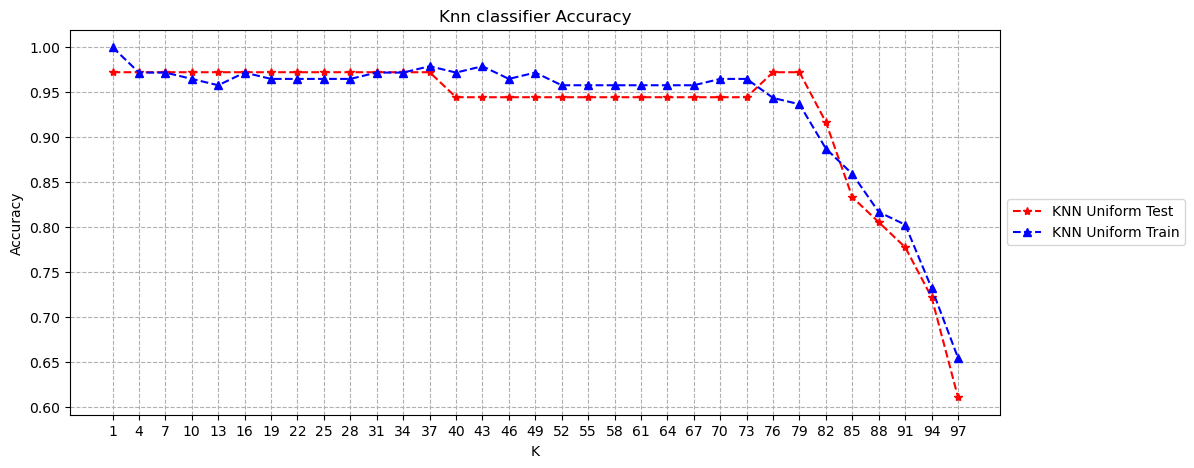

In [604]:
Ks=list(range(1, 100,3))
plt.figure(figsize=(12,5))
plt.plot(Ks, k_uniform_accuracy_scores_test, 'r*--', label='KNN Uniform Test')
plt.plot(Ks, k_uniform_accuracy_scores_train, 'b^--', label='KNN Uniform Train') 
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Knn classifier Accuracy')
plt.grid(linestyle='--')
plt.xticks(Ks)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

The graph indicates that overfitting occurs when K is small (around 1 to 10), as the model achieves perfect accuracy on the training data but shows slight fluctuations in test accuracy. As K increases to a range between 20 and 70, both training and test accuracies stay high and closely aligned, suggesting the model generalizes well. However, for K values greater than 80, both accuracies decline significantly, indicating underfitting, where the model fails to capture essential patterns. The ideal range for K appears to be between 20 and 70, where the model balances between underfitting and overfitting.

### c.	[10 pts] Using the non-normalized training and test data, perform classification using scikit-learn's decision tree classifier (using the default parameters). As above, generate the confusion matrix, classification report, and average accuracy scores of the classifier. Compare the average accuracy score on the test and the training data sets. What does the comparison tell you in terms of bias-variance trade-off? Next, create another decision tree model (trained on the non-normalized training data) using "gini" index as the selection criteria, min_samples_split=10, and max_depth=4. Show the accuracy results for both the training and test sets. For this model generate a visualization of tree embedded in the Jupyter Notebook.

In [610]:
from sklearn import tree

In [606]:
dfWine_train_set, dfWine_test_set, dfWine_train_classes, dfWine_test_classes = train_test_split(dfWine, dfWineTarget, test_size=0.2, random_state=111)

In [612]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)

In [614]:
treeclf = treeclf.fit(dfWine_train_set,dfWine_train_classes)

In [616]:
treepreds_test = treeclf.predict(dfWine_test_set)
print(treepreds_test)

[1 1 0 1 1 2 1 1 2 0 2 1 1 0 0 0 2 1 2 1 1 0 0 2 0 2 1 2 0 0 1 0 0 0 2 0]


In [618]:
print(treeclf.score(dfWine_test_set, dfWine_test_classes))

0.9444444444444444


In [620]:
print(treeclf.score(dfWine_train_set, dfWine_train_classes))

1.0


In [622]:
#clf report
print(classification_report(dfWine_test_classes, treepreds_test))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       0.92      0.92      0.92        13
           2       1.00      0.90      0.95        10

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36



In [624]:
#confusion matrix
treecm = confusion_matrix(dfWine_test_classes, treepreds_test)
print(treecm)

[[13  0  0]
 [ 1 12  0]
 [ 0  1  9]]


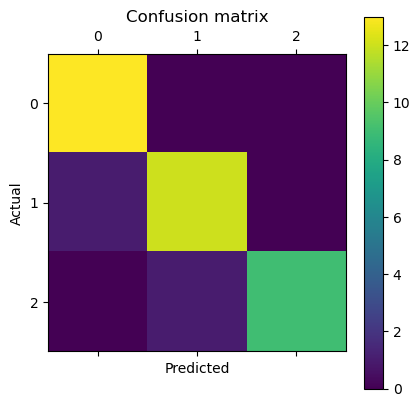

In [626]:
import pylab as plt
%matplotlib inline
plt.matshow(treecm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [628]:
#second tree
treeclf = tree.DecisionTreeClassifier(criterion='gini', min_samples_split=10,max_depth=4)

In [630]:
treeclf = treeclf.fit(dfWine_train_set,dfWine_train_classes)

In [632]:
treepreds_test = treeclf.predict(dfWine_test_set)
print(treepreds_test)

[1 1 0 1 1 2 1 1 2 0 2 1 1 0 0 0 2 1 2 1 1 0 0 2 0 2 1 2 0 0 1 1 0 0 2 0]


In [634]:
print(treeclf.score(dfWine_test_set, dfWine_test_classes))

0.9166666666666666


In [636]:
print(treeclf.score(dfWine_train_set, dfWine_train_classes))

1.0


In [638]:
#clf report
print(classification_report(dfWine_test_classes, treepreds_test))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.86      0.92      0.89        13
           2       1.00      0.90      0.95        10

    accuracy                           0.92        36
   macro avg       0.93      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



In [640]:
#confusion matrix
treecm = confusion_matrix(dfWine_test_classes, treepreds_test)
print(treecm)

[[12  1  0]
 [ 1 12  0]
 [ 0  1  9]]


#### Visualizing the decision tree

In [660]:
from sklearn.tree import export_graphviz
#conda install graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

tree = export_graphviz(treeclf, out_file=None, feature_names=dfWine_train_set.columns, class_names=['0','1', '2'])
graph = Source(tree)

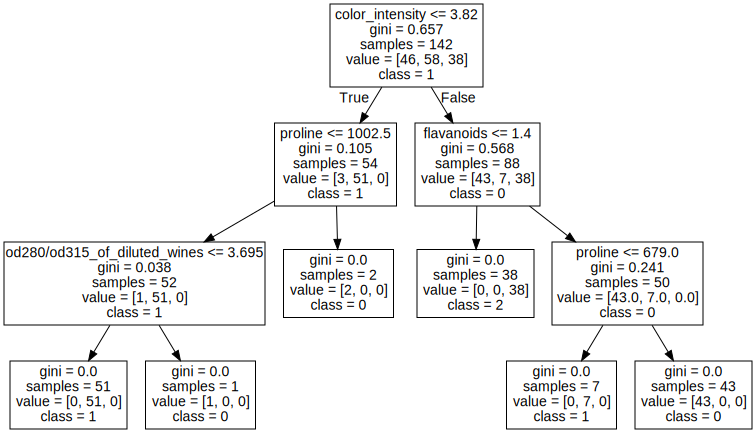

In [662]:
display(SVG(graph.pipe(format='svg')))

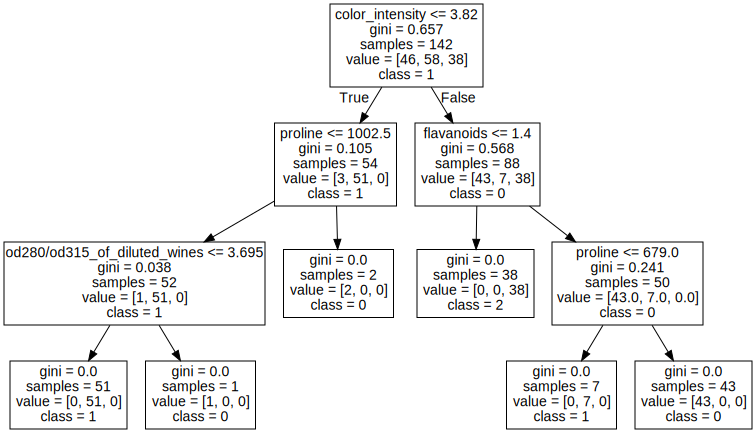

In [666]:
tree = export_graphviz(treeclf,out_file='tree.dot', feature_names=dfWine_train_set.columns, class_names=['0','1','2'])

import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph, format="png")

In [668]:
system(dot -Tpng tree.dot -o dtree.png)

[]

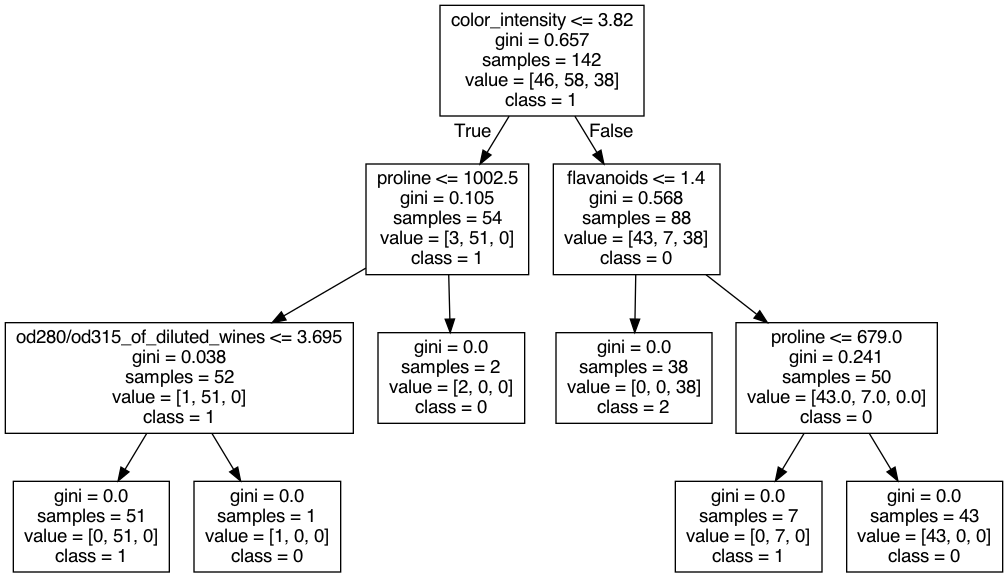

In [670]:
from IPython.display import Image
Image(filename='dtree.png', width=900)

### d. Use scikit-learn to build classifiers using Naive Bayes (Gaussian) and linear discriminant analysis (LDA).  For each of these perform 10-fold cross-validation on the 80% training data (using cross-validation module in scikit-learn) and report the overall average accuracy. Compare this cross-validation accuracy to the model accuracy on the training data as a whole. Finally, run your model on the set-aside 20% test data.

#####  Naive Bayes

In [693]:
from sklearn import naive_bayes
from sklearn.model_selection import train_test_split, cross_val_score

In [695]:
gnb_cv_scores = cross_val_score(gnb, dfWine_train_set, dfWine_train_classes, cv=10, scoring='accuracy')
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(dfWine_train_set, dfWine_train_classes)
nbpreds_test = nbclf.predict(dfWine_test_set)
print(nbpreds_test)

[1 2 0 2 1 2 1 1 2 0 2 1 1 0 0 0 2 1 2 1 1 0 0 2 0 2 1 2 1 0 1 1 0 0 2 0]


In [677]:
print(nbclf.score(dfWine_train_set, dfWine_train_classes))

1.0


##### Linear discriminant analysis

In [683]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

ldclf = LinearDiscriminantAnalysis()
ldclf = ldclf.fit(dfWine_train_set, dfWine_train_classes)
ldpreds_test = ldclf.predict(dfWine_test_set)
print(ldpreds_test)

[1 1 0 2 1 2 1 1 2 0 2 1 1 0 0 0 2 1 2 1 1 0 0 2 0 2 1 2 1 0 1 0 0 0 2 0]


In [687]:
print(ldclf.score(dfWine_train_set, dfWine_train_classes))

1.0


##### CV

In [712]:
cv_scores = cross_val_score(nbclf, dfWine_train_set, dfWine_train_classes, cv=10)
cv_scores

array([1.  , 1.  , 1.  , 0.93, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ])

In [716]:
cv_scores = cross_val_score(ldclf, dfWine_train_set, dfWine_train_classes, cv=10)
cv_scores

array([1.  , 0.93, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ])

In [718]:
print("Overall LDA Accuracy on X-Val: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Overall LDA Accuracy on X-Val: 0.99 (+/- 0.04)


##### Test Data accuracy

In [681]:
#NB
print(nbclf.score(dfWine_test_set, dfWine_test_classes))

0.9444444444444444


In [723]:
#LDA
print(ldclf.score(dfWine_test_set, dfWine_test_classes))

1.0
